In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Dataset/Air_Quality_History.csv")
df.head()

,AQSID,SITE_NUM,STATE_CODE,STATE_NAME,COUNTY_NAME,PARAMETER_CODE,PARAMETER_NAME,DATETIME_LOCAL,POC,LATITUDE,...,ARITHMETIC_MEAN,FIRST_MAX_VALUE,FIRST_MAX_HOUR,OBSERVATION_COUNT,OBSERVATION_PERCENT,LOCAL_SITE_NAME,ADDRESS,CITY_NAME,CBSA_NAME,OBJECTID
0,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/17 05:00:00+00,1,38.895572,...,7,11.3,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216681
1,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/18 05:00:00+00,1,38.895572,...,6,18.6,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216682
2,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/08 04:00:00+00,1,38.895572,...,7,17.5,3,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216862
3,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/09 04:00:00+00,1,38.895572,...,5,7.7,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216863
4,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/10 04:00:00+00,1,38.895572,...,9,18.3,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216864


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45352 entries, 0 to 45351
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQSID                45352 non-null  int64  
 1   SITE_NUM             45352 non-null  int64  
 2   STATE_CODE           45352 non-null  int64  
 3   STATE_NAME           45352 non-null  object 
 4   COUNTY_NAME          45352 non-null  object 
 5   PARAMETER_CODE       45352 non-null  int64  
 6   PARAMETER_NAME       45352 non-null  object 
 7   DATETIME_LOCAL       45352 non-null  object 
 8   POC                  45352 non-null  int64  
 9   LATITUDE             45352 non-null  float64
 10  LONGITUDE            45352 non-null  float64
 11  DATUM                45352 non-null  object 
 12  UNITS_OF_MEASURE     45352 non-null  object 
 13  METHOD_CODE          44464 non-null  float64
 14  METHOD_NAME          45352 non-null  object 
 15  DATE_OF_LAST_CHANGE  45352 non-null 

In [4]:
df.describe()

,AQSID,SITE_NUM,STATE_CODE,PARAMETER_CODE,POC,LATITUDE,LONGITUDE,METHOD_CODE,AQI,ARITHMETIC_MEAN,FIRST_MAX_VALUE,FIRST_MAX_HOUR,OBSERVATION_COUNT,OBSERVATION_PERCENT,OBJECTID
count,4.535200e+04,45352.000000,45352.0,45352.000000,45352.000000,45352.000000,45352.000000,44464.000000,10348.000000,45352.000000,45352.000000,45352.000000,45352.000000,45352.000000,45352.000000
mean,1.100100e+08,44.440333,11.0,73863.368231,3.184556,38.916370,-77.001267,535.070866,25.295516,57.157545,62.730565,4.824682,9.801133,102.934446,239675.319589
std,3.311160e+00,3.311160,0.0,17759.130793,1.882266,0.015467,0.023649,340.698739,17.650227,201.706414,205.118864,7.395541,10.740522,96.142861,13092.452080
min,1.100100e+08,41.000000,11.0,42101.000000,1.000000,38.818724,-77.016715,14.000000,0.000000,-5.000000,-4.600000,0.000000,1.000000,4.000000,216681.000000
25%,1.100100e+08,43.000000,11.0,62101.000000,1.000000,38.921847,-77.013178,129.000000,11.000000,0.000000,0.038000,0.000000,1.000000,100.000000,228337.750000
50%,1.100100e+08,43.000000,11.0,88101.000000,4.000000,38.921847,-77.013178,811.000000,24.000000,1.000000,0.720000,0.000000,1.000000,100.000000,239675.500000
75%,1.100100e+08,43.000000,11.0,88185.000000,5.000000,38.921847,-77.013178,812.000000,35.000000,10.000000,13.800000,9.000000,24.000000,100.000000,251013.250000
max,1.100101e+08,55.000000,11.0,88403.000000,6.000000,38.970092,-76.953426,898.000000,196.000000,1035.000000,1038.600000,23.000000,30.000000,3000.000000,262351.000000


In [5]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("/", "_")
)
df.isnull().sum().sort_values(ascending=False)

event_type             45287
aqi                    35004
pollutant_standard     33852
method_code              888
state_code                 0
aqsid                      0
parameter_code             0
parameter_name             0
poc                        0
datetime_local             0
latitude                   0
state_name                 0
county_name                0
site_num                   0
units_of_measure           0
datum                      0
longitude                  0
method_name                0
sample_duration            0
date_of_last_change        0
arithmetic_mean            0
first_max_value            0
first_max_hour             0
observation_count          0
observation_percent        0
local_site_name            0
address                    0
city_name                  0
cbsa_name                  0
objectid                   0
dtype: int64

In [6]:
df = df[df["parameter_name"].str.contains("nitrogen dioxide", case=False)]

df = df[
    [
        "datetime_local",
        "arithmetic_mean",
        "first_max_value",
        "aqi"
    ]
]


In [7]:
df["datetime_local"] = pd.to_datetime(df["datetime_local"], errors="coerce")
df["hour"] = df["datetime_local"].dt.hour
df["day"] = df["datetime_local"].dt.day
df["month"] = df["datetime_local"].dt.month

In [8]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [9]:
df.rename(
    columns={
        "arithmetic_mean": "no2_mean",
        "first_max_value": "no2_max"
    },
    inplace=True
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   datetime_local  3282 non-null   datetime64[ns, UTC]
 1   no2_mean        3282 non-null   int64              
 2   no2_max         3282 non-null   float64            
 3   aqi             3282 non-null   float64            
 4   hour            3282 non-null   int32              
 5   day             3282 non-null   int32              
 6   month           3282 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(3), int64(1)
memory usage: 141.2 KB


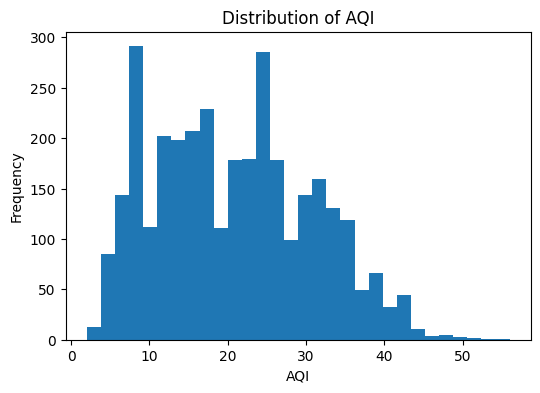

In [11]:
plt.figure(figsize=(6,4))
plt.hist(df["aqi"], bins=30)
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("Distribution of AQI")
plt.show()

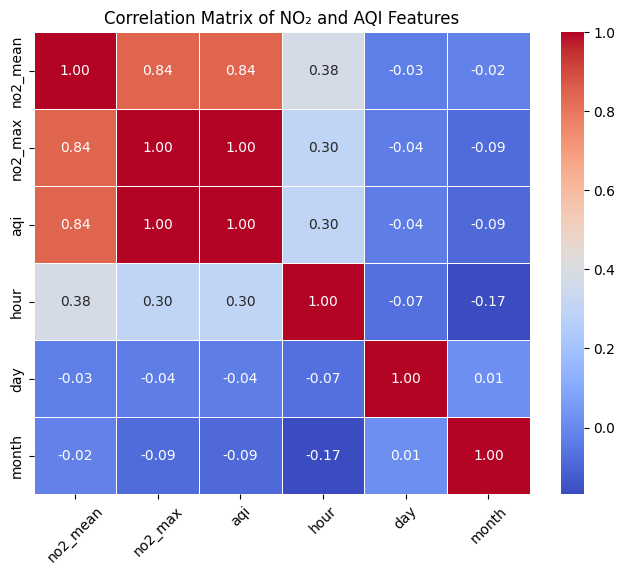

In [12]:
import seaborn as sns

corr_features = [
    "no2_mean",
    "no2_max",
    "aqi",
    "hour",
    "day",
    "month"
]

plt.figure(figsize=(8,6))
plt.imshow(df[corr_features].corr(), aspect="auto")
plt.xticks(range(len(corr_features)), corr_features, rotation=45)
plt.yticks(range(len(corr_features)), corr_features)
sns.heatmap(
    df[corr_features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of NO₂ and AQI Features")
plt.show()

In [25]:
X_lr = df[["no2_mean"]]
y_lr = df["aqi"]

X_train, X_test, y_train, y_test = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42
)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R²: 0.6938842919221819
Linear Regression RMSE: 5.326314852611231


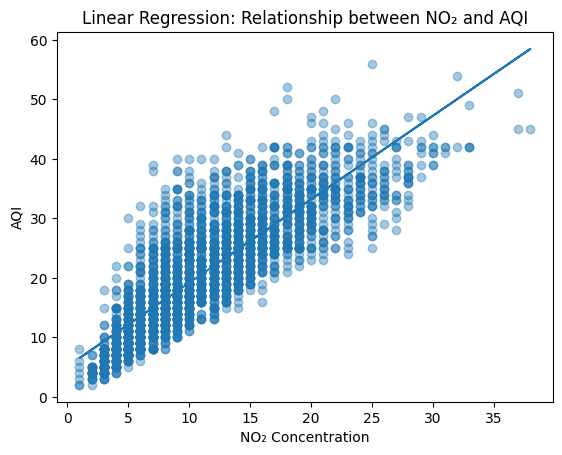

In [28]:
plt.figure()
plt.scatter(df["no2_mean"], df["aqi"], alpha=0.4)
plt.plot(df["no2_mean"], lr.predict(df[["no2_mean"]]))
plt.xlabel("NO₂ Concentration")
plt.ylabel("AQI")
plt.title("Linear Regression: Relationship between NO₂ and AQI")
plt.show()


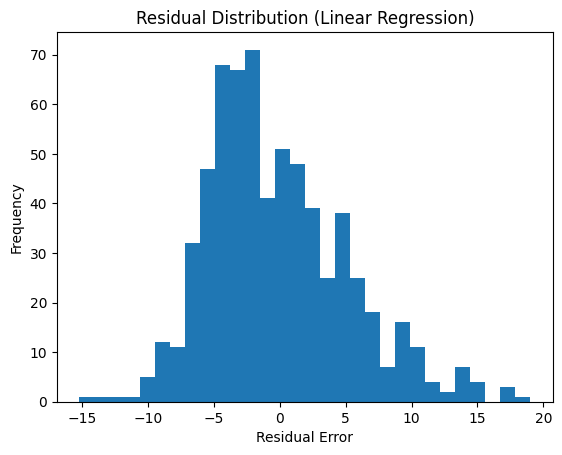

In [29]:
residuals = y_test - y_pred_lr

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Linear Regression)")
plt.show()

In [30]:
features = ["no2_mean", "no2_max", "hour", "day", "month"]
X = df[features]
y = df["aqi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R²: 0.9998867609747819
Random Forest RMSE: 0.10244295290402157


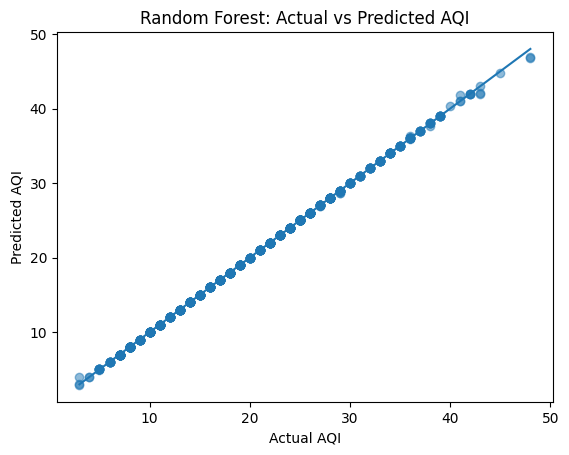

In [34]:
plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted AQI")
plt.show()

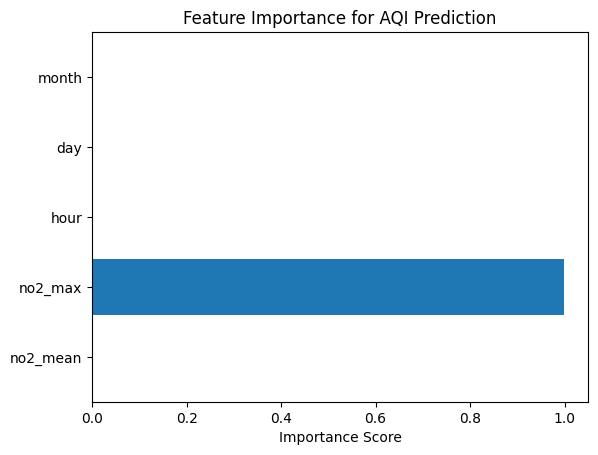

In [35]:
plt.figure()
plt.barh(features, rf.feature_importances_)
plt.xlabel("Importance Score")
plt.title("Feature Importance for AQI Prediction")
plt.show()

In [36]:
cluster_data = df[["no2_mean", "aqi"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

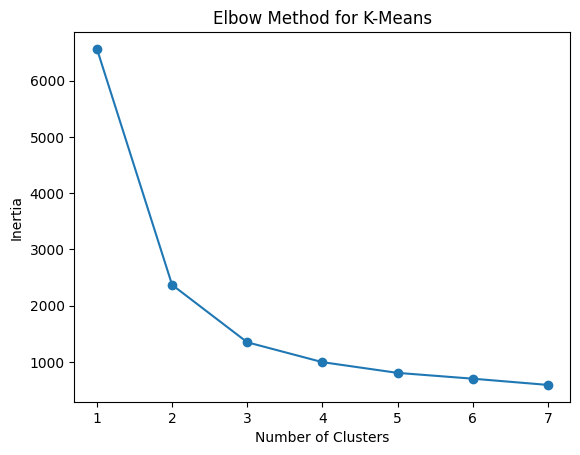

In [37]:
inertia = []

for k in range(1, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_data)

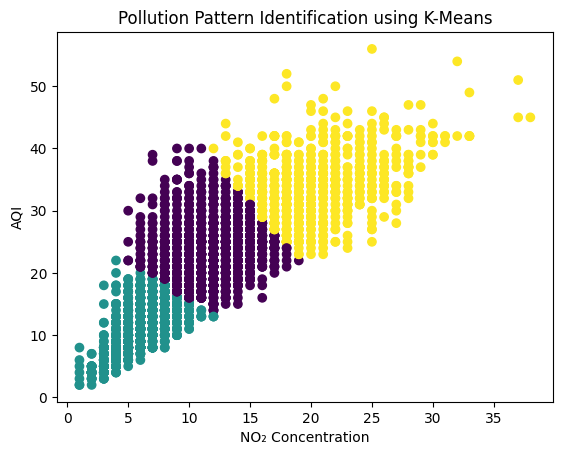

In [39]:
plt.figure()
plt.scatter(df["no2_mean"], df["aqi"], c=df["cluster"])
plt.xlabel("NO₂ Concentration")
plt.ylabel("AQI")
plt.title("Pollution Pattern Identification using K-Means")
plt.show()

In [50]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good", "Air quality is satisfactory."
    elif aqi <= 100:
        return "Moderate", "Air quality is acceptable."
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups", "Reduce outdoor activity."
    elif aqi <= 200:
        return "Unhealthy", "Avoid heavy outdoor exertion."
    elif aqi <= 300:
        return "Very Unhealthy", "Stay indoors."
    else:
        return "Hazardous", "Avoid all outdoor activity."

print("\n=== AQI PREDICTION USING NO₂ MEAN ===\n")

try:
    no2_mean = float(input("Enter NO₂ mean concentration: "))

    predicted_aqi = lr.predict([[no2_mean]])[0]

    category, advice = aqi_category(predicted_aqi)

    print("\n--- RESULT ---")
    print(f"Predicted AQI: {predicted_aqi:.2f}")
    print(f"Category: {category}")
    print(f"Health Advice: {advice}")

except:
    print("Invalid input. Please enter a numeric value.")


=== AQI PREDICTION USING NO₂ MEAN ===


--- RESULT ---
Predicted AQI: 180.65
Category: Unhealthy
Health Advice: Avoid heavy outdoor exertion.


C:\Users\Acer Nitro5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
